# Question 1: Operations in Matrix Multiplication

### Assumption

Let us assume that we are using the most basic algorithm for multiplying matrices.

### Calculation

Upon multiplying a $n \times k$ matrix $A$ with a $k \times m$ matrix $B$, we get a $n \times m$ matrix $C$. The elements of this matrix $C$ can be defined as:

$$C_{ij} = \sum_{t=1}^{k} A_{it} B_{tj}$$

where, $C_{ij}$ refers to the element belonging to the $i^{th}$ row and the $j^{th}$ column. Similarly, $A_{it}$ refers to the element belonging to the $i^{th}$ row and the $t^{th}$ column; and $B_{tj}$ refers to the element belonging to the $t^{th}$ row and the $j^{th}$ column.

So, for each element $C_{ij}$ in the matrix $C$, we need $k$ multiplications and $k - 1$ additions, as we can see from the above expression for $C_{ij}$.

Therefore, for such $n \times m$ elements:

$$Multiplications = n \times m \times k$$
$$Additions = n \times m \times (k - 1)$$

Hence, total no. of operations = $n \times m \times (2k - 1)$

### Python Code

In [49]:
from typing import Dict, List

In [77]:
# pre known number of operations
def operations_count(n: int, k: int, m: int) -> Dict[str, int]:
    mul_ops = n * m * k
    add_ops = n * m * (k - 1)
    
    return {"multiplications": mul_ops, "additions": add_ops, "total": mul_ops + add_ops}

In [79]:
import random

def multiply_matrix(n: int, k: int, m: int) -> Dict[str, int]:
    # define matrices
    A = [[random.random() for _ in range(k)] for __ in range(n)]
    B = [[random.random() for _ in range(m)] for __ in range(k)]
    
    mul_ops = add_ops = 0

    # perform matrix multiplication
    for i in range(n):
        for j in range(m):
            sum = 0
            
            for t in range(k):
                sum_term = A[i][t] * B[t][j]
                mul_ops += 1
                
                if t == 0:
                    sum = sum_term
                else:
                    sum += sum_term
                    add_ops += 1
    
    return {"multiplications": mul_ops, "additions": add_ops, "total": mul_ops + add_ops}

In [81]:
print("Calculated: ", operations_count(4, 5, 2))
print("Actual: ", multiply_matrix(4, 5, 2))

Calculated:  {'multiplications': 40, 'additions': 32, 'total': 72}
Actual:  {'multiplications': 40, 'additions': 32, 'total': 72}


---

# Question 2: Time Taken for Matrix Multiplication

We will implement two methods for matrix multiplication.

1. **Pure Python**: list of lists, using a triple-loop.
2. **Numpy**: Using `np.matmul`.

### Python Code

In [75]:
# Matrix sizes
n, k, m = 120, 150, 100

In [83]:
import random
import numpy as np

# using same seed to reproduce random numbers
random_generator = random.Random(0)
np_random_generator = np.random.default_rng(0)

In [95]:
def py_matrix(rows, cols, low=-5, high=5):
    return [[random_generator.randint(low, high) for _ in range(cols)] for __ in range(rows)]

In [97]:
# define matrices
A_py = py_matrix(n, k)
B_py = py_matrix(k, m)

A_np = np.array(A_py, dtype=np.int64)
B_np = np.array(B_py, dtype=np.int64)

In [112]:
# pure python implementation
def py_multiply_matrix(A, B):
    C = [[0] * m for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            sum = 0
            
            for t in range(k):
                sum += A[i][t] * B[t][j]
            
            C[i][j] = sum
    
    return C

In [102]:
# numpy implementation
def np_multiply_matrix(A, B):
    return np.matmul(A, B)

In [108]:
from statistics import median
import time

# comparing time taken by both implementations
def compare_time(function, *args, repeats=10):
    times = []
    
    for _ in range(repeats):
        t0 = time.perf_counter()
        
        function(*args)
        
        t1 = time.perf_counter()
        
        times.append(t1 - t0)
        
    return min(times), median(times), max(times)

In [114]:
py_time = compare_time(py_multiply_matrix, A_py, B_py, repeats=5)
np_time = compare_time(np_multiply_matrix, A_np, B_np, repeats=5)

In [116]:
print(f"Pure Python: min = {py_time[0]:.4f}s, median = {py_time[1]:.4f}s, max = {py_time[2]:.4f}s")
print(f"NumPy: min = {np_time[0]:.6f}s, median = {np_time[1]:.6f}s, max = {np_time[2]:.6f}s")

Pure Python: min = 0.0578s, median = 0.0601s, max = 0.0990s
NumPy: min = 0.000572s, median = 0.000576s, max = 0.002204s


### Reason for Time Difference

We can clearly observe that numpy is significantly faster. This is because of how basic operations are implemented in numpy, described by the following factors:

1. Numpy uses BLAS and LAPACK for implementing standard linear algebra. This uses the CPU's vector instructions at the low-level and can parallelize operations, avoiding Python's per element overhead.
2. Numpy arrays are contiguous and have better cache locality and prefetching capability.

So, in asymptotic terms, both are $O(nkm)$, but low-level optimizations make numpy faster in practice.

---

# Question 3 — Median of an Array

### Time Complexity

- Finding the maximum element of an array of length $n$ takes one linear pass $= \theta (n)$.
- Finding the second largest element takes two linear passes $= \theta (2n) = \theta (n)$.

If we extend this idea to the median (the $\lceil n/2 \rceil$-th order statistic), we need about $k=\lceil n/2 \rceil$ linear passes, each costing $\theta (n)$:

$$\text{time} = \theta (k n) = \theta \big(n \cdot \frac{n}{2}\big) = \theta (\frac{n^2}{2}) = \theta (n^2)$$

So the repeated-pass method to find the median costs us $\theta (n^2)$.

A better method we can use is called **median of medians**, which is a deterministic selection algorithm for finding the $k^{th}$ smallest element (including the median) in an unsorted list in linear time.

### Implementation

We will now implement:
1. Repeated‑pass method: $\theta (n^2)$
2. Median of Medians: deterministic $\theta (n)$ worst case selection
3. Compare both against `numpy.median`

### Python Code

In [199]:
import random
import numpy as np

# using same seed to reproduce random numbers
random_generator = random.Random(0)

In [157]:
from typing import List

def make_list(n: int, low: int = -10000, high: int = 10000) -> List[int]:
    return [random_generator.randint(low, high) for _ in range(n)]

In [181]:
# repeated pass method

def remove_max(l: List[int]) -> int:
    max_val_index = 0
    max_val = l[0]

    for i in range(1, len(l)):
        if l[i] > max_val:
            max_val = l[i]
            max_val_index = i

    l.pop(max_val_index)
    
    return max_val

def median_repeated_pass(a: List[int]):
    n = len(a)
    
    if n == 0:
        return

    arr = a[:]

    if n % 2 == 1:
        work_arr = arr[:]
        
        for _ in range(n // 2):
            remove_max(work_arr)
        
        current_max_val = work[0]
        
        for val in work[1:]:
            if val > current_max_val:
                current_max_val = val
        
        return current_max_val
    
    else:
        work_arr = arr[:]
        
        for _ in range(n // 2 - 1):
            remove_max(work_arr)
        
        max1_index = 0
        max1_val = work_arr[0]
        
        for i in range(1, len(work_arr)):
            if work_arr[i] > max1_val:
                max1_val = work_arr[i]
                max1_index = i
                
        work_arr.pop(max1_index)
        
        max2_val = work_arr[0]
        
        for val in work_arr[1:]:
            if val > max2_val:
                max2_val = val
                
        return (max1_val + max2_val) / 2

In [191]:
# median of medians algorithm

def kth_element(A: List[int], k: int) -> int:
        n = len(A)
        
        if n <= 5:
            return sorted(A)[k]
            
        groups = [A[i : i + 5] for i in range(0, n, 5)]
        medians = [sorted(g) [len(g) // 2] for g in groups]
        pivot = kth_element(medians, len(medians) // 2)
        lows, pivots, highs = [], [], []
        
        for x in A:
            if x < pivot: lows.append(x)
            elif x > pivot: highs.append(x)
            else: pivots.append(x)
                
        if k < len(lows):
            return kth_element(lows, k)
            
        elif k < len(lows) + len(pivots):
            return pivot
            
        else:
            return kth_element(highs, k - len(lows) - len(pivots))

def select_kth(a: List[int], k: int) -> int:
    if not (0 <= k < len(a)):
        raise IndexError("k out of bounds")
        
    A = a[:]
            
    return kth_element(A, k)

def median_of_medians(a: List[int]):
    n = len(a)
    
    if n == 0:
        return
        
    mid = n // 2
    
    if n % 2 == 1:
        return select_kth(a, mid)
        
    else:
        lower = select_kth(a, mid - 1)
        upper = select_kth(a, mid)
        
        return (lower + upper) / 2

In [167]:
# median using numpy

def median_numpy(a: List[int]):
    return float(np.median(np.array(a)))

In [195]:
# compare time taken by all implementations

def compare_time(function, *args, repeats=10):
    times = []
    
    for _ in range(repeats):
        t0 = time.perf_counter()
        function(*args)
        t1 = time.perf_counter()
        
        times.append(t1 - t0)
        
    return min(times), sum(times) / len(times), max(times)

def run_timings(n):
    data = make_list(n)
    a1, a2, a3 = data[:], data[:], data[:]
    
    time_repeated = compare_time(median_repeated_pass, a1, repeats=10)
    time_mom = compare_time(median_of_medians, a2, repeats=10)
    time_np = compare_time(median_numpy, a3, repeats=10)
    
    print(f"Repeated linear passes: min = {time_repeated[0]:.4f}s, average = {time_repeated[1]:.4f}s, max = {time_repeated[2]:.4f}s")
    print(f"Median of medians: min = {time_mom[0]:.6f}s, average = {time_mom[1]:.6f}s, max = {time_mom[2]:.6f}s")
    print(f"Numpy median: min = {time_np[0]:.6f}s, average = {time_np[1]:.6f}s, max = {time_np[2]:.6f}s")

In [197]:
run_timings(20000)

Repeated linear passes: min = 1.8558s, average = 1.9128s, max = 1.9628s
Median of medians: min = 0.008510s, average = 0.015311s, max = 0.045331s
Numpy median: min = 0.000549s, average = 0.000615s, max = 0.000791s


---

# Question 4: Gradient of a Function

### Calculation

We are given:

$$f(x, y) = x^2y + y^3sinx$$

We first need to calculate the partial derivatives with respect to $x$ and $y$.

- With respect to $x$:

  $$
  \frac{\partial f}{\partial x}
  = \frac{\partial}{\partial x}\big[(x^2)y\big] + \frac{\partial}{\partial x}\big[(y^3)\sin x\big]
  = 2xy + y^3\cos x
  $$

- With respect to $y$:

  $$
  \frac{\partial f}{\partial y}
  = \frac{\partial}{\partial y}\big[(x^2)y\big] + \frac{\partial}{\partial y}\big[(y^3)\sin x\big]
  = x^2 + 3y^2\sin x
  $$


Now, we can define the gradient like so:

$$\nabla f(x,y) = \big[2xy + y^3\cos x,\; x^2 + 3y^2\sin x\big]$$

---

# Question 5: Gradient Verification using JAX

We use `JAX` to compute $\nabla f(x,y)$ via automatic differentiation and compare it to the analytical result from the previous question on a few random $(x,y)$ pairs.

### Python Code

In [221]:
!pip install -q jax jaxlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [225]:
import jax
import jax.numpy as jnp
import math

def grad_fx(x, y):
    return 2 * x * y + (y ** 3) * math.cos(x)

def grad_fy(x, y):
    return x ** 2 + 3 * (y ** 2) * math.sin(x)

def f(x, y):
    return (x ** 2) * y + (y ** 3) * jnp.sin(x)

In [227]:
grad_f = jax.grad(f, argnums=(0, 1))

random.seed(0)
samples = [(random.uniform(-2.0, 2.0), random.uniform(-2.0, 2.0)) for _ in range(5)]

In [255]:
print("JAX vs Analytical gradient comparisons:\n")

for x, y in samples:
    gx_j, gy_j = grad_f(jnp.float64(x), jnp.float64(y))
    gx_a = grad_fx(x, y)
    gy_a = grad_fy(x, y)
    print(f"(x={x:+.4f}, y={y:+.4f})  "
          f"df/dx: JAX={float(gx_j):+.6f}, Analytic={gx_a:+.6f}  |  "
          f"df/dy: JAX={float(gy_j):+.6f}, Analytic={gy_a:+.6f}")

JAX vs Analytical gradient comparisons:

(x=+1.3777, y=+1.0318)  df/dx: JAX=+3.053863, Analytic=+3.053863  |  df/dy: JAX=+5.032597, Analytic=+5.032597
(x=-0.3177, y=-0.9643)  df/dx: JAX=-0.239125, Analytic=-0.239125  |  df/dy: JAX=-0.770584, Analytic=-0.770583
(x=+0.0451, y=-0.3803)  df/dx: JAX=-0.089229, Analytic=-0.089229  |  df/dy: JAX=+0.021591, Analytic=+0.021591
(x=+1.1352, y=-0.7867)  df/dx: JAX=-1.991709, Analytic=-1.991709  |  df/dy: JAX=+2.972182, Analytic=+2.972182
(x=-0.0936, y=+0.3335)  df/dx: JAX=-0.025505, Analytic=-0.025505  |  df/dy: JAX=-0.022432, Analytic=-0.022432


---

# Question 6: Symbolic Gradient Verification using SymPy

We will compute $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ using SymPy.

### Python Code

In [247]:
!pip install -q sympy

In [251]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
f = (x ** 2) * y + (y ** 3) * sp.sin(x)

# Symbolic partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("SymPy df/dx:", sp.simplify(df_dx))
print("SymPy df/dy:", sp.simplify(df_dy))

# Expected (from Q4)
df_dx_expected = 2 * x * y + (y ** 3) * sp.cos(x)
df_dy_expected = x ** 2 + 3 * (y ** 2) * sp.sin(x)

print("Match df/dx? ->", sp.simplify(df_dx - df_dx_expected) == 0)
print("Match df/dy? ->", sp.simplify(df_dy - df_dy_expected) == 0)

SymPy df/dx: y*(2*x + y**2*cos(x))
SymPy df/dy: x**2 + 3*y**2*sin(x)
Match df/dx? -> True
Match df/dy? -> True


---

# Question 7: Nested Dictionary

We need to represnt the given hierarchical data of students in a python dictionary.

In [260]:
students = {
    2022: {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "Mayank",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85
                }
            }
        ],
        "Branch 2": []
    },
    2023: {
        "Branch 1": [],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

We can now pretty print the dictionary to view the data.

In [277]:
from pprint import pprint

pprint(students)

{2022: {'Branch 1': [{'Marks': {'English': 70, 'Maths': 100, 'Science': 85},
                      'Name': 'Mayank',
                      'Roll Number': 1}],
        'Branch 2': []},
 2023: {'Branch 1': [], 'Branch 2': []},
 2024: {'Branch 1': [], 'Branch 2': []},
 2025: {'Branch 1': [], 'Branch 2': []}}


---

# Question 8: Implementing Data using Classes

We will first implement the structure of the data using python classes

In [282]:
from typing import Dict, List

class Student:
    roll_number: int
    name: str
    marks: Dict[str, float]

class Branch:
    name: str
    students: List[Student]

class Year:
    year: int
    branches: List[Branch]

class Database:
    years: List[Year]

We can create variables to store the data of the students

s1 = Student()
s1.roll_number = 1
s1.name = "Mayank"
s1.marks = {"Maths": 100, "English": 70, "Science": 85}

b1_2022 = Branch()
b1_2022.name = "Branch 1"
b1_2022.students = [s1]

b2_2022 = Branch()
b2_2022.name = "Branch 2"
b2_2022.students = []

b1_2023 = Branch()
b1_2023.name = "Branch 1"
b1_2023.students = []

b2_2023 = Branch()
b2_2023.name = "Branch 2"
b2_2023.students = []

b1_2024 = Branch()
b1_2024.name = "Branch 1"
b1_2024.students = []

b2_2024 = Branch()
b2_2024.name = "Branch 2"
b2_2024.students = []

b1_2025 = Branch()
b1_2025.name = "Branch 1"
b1_2025.students = []

b2_2025 = Branch()
b2_2025.name = "Branch 2"
b2_2025.students = []

y_2022 = Year()
y_2022.year = 2022
y_2022.branches = [b1_2022, b2_2022]

y_2023 = Year()
y_2023.year = 2023
y_2023.branches = [b1_2023, b2_2023]

y_2024 = Year()
y_2024.year = 2024
y_2024.branches = [b1_2024, b2_2024]

y_2025 = Year()
y_2025.year = 2025
y_2025.branches = [b1_2025, b2_2025]

db = Database()
db.years = [y_2022, y_2023, y_2024, y_2025]

---

# Question 9: Plotting Functions

We need to plot the given functions on the domain $x = 0.5$ to $100.0$ in steps of $0.5$

In [304]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.1, 0.5)

1. $y = x$

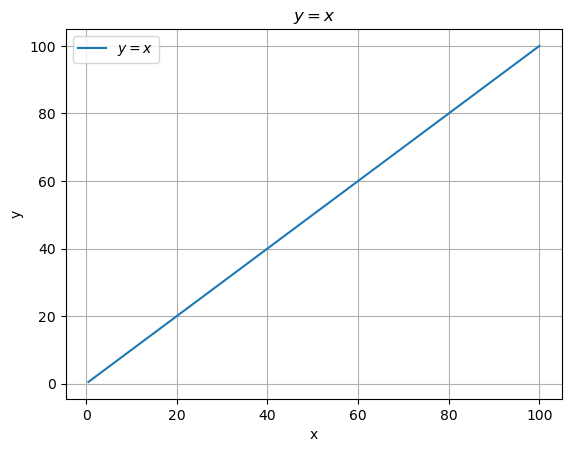

In [325]:
y = x

plt.figure()

plt.plot(x, y, label=r"$y = x$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = x$")

plt.legend()
plt.grid(True)
plt.show()

2. $y = x^2$

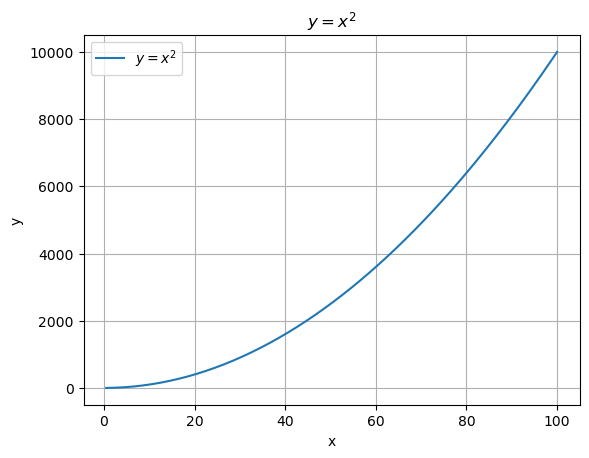

In [323]:
y = x ** 2

plt.figure()

plt.plot(x, y, label=r"$y = x^2$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = x^2$")

plt.legend()
plt.grid(True)
plt.show()

3. $y = \frac{x^3}{100}$

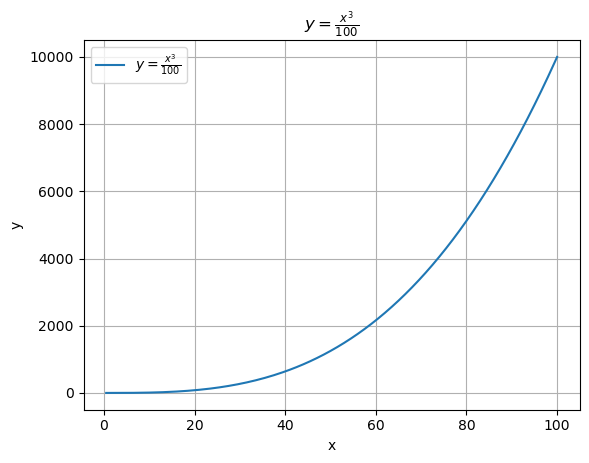

In [334]:
y = x ** 3 / 100

plt.figure()

plt.plot(x, y, label=r"$y = \frac{x^3}{100}$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = \frac{x^3}{100}$")

plt.legend()
plt.grid(True)
plt.show()

4. $y = \sin(x)$

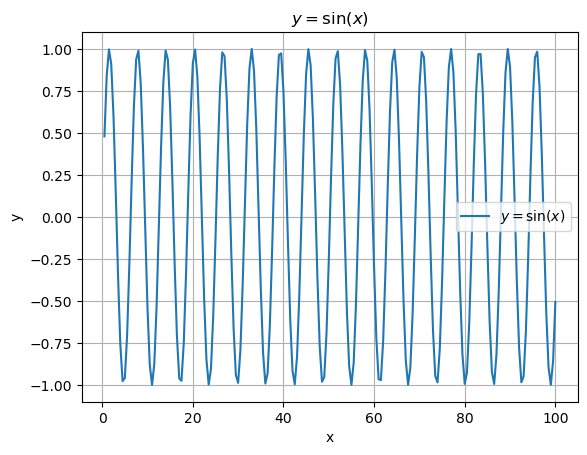

In [337]:
y = np.sin(x)

plt.figure()
plt.plot(x, y, label=r"$y = \sin(x)$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = \sin(x)$")

plt.legend()
plt.grid(True)
plt.show()

5. $y = \frac{\sin(x)}{x}$

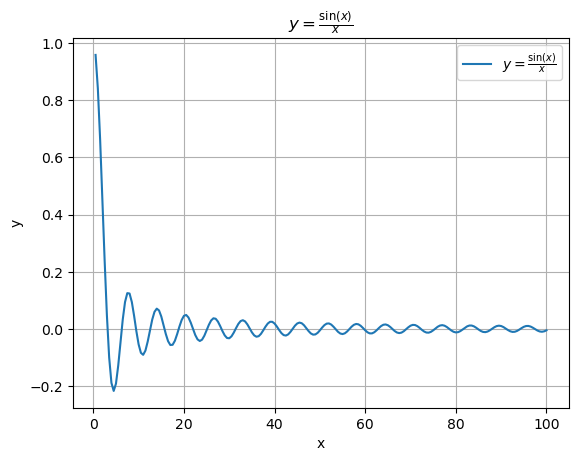

In [343]:
y = np.sin(x) / x

plt.figure()
plt.plot(x, y, label=r"$y = \frac{\sin(x)}{x}$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = \frac{\sin(x)}{x}$")

plt.legend()
plt.grid(True)
plt.show()

6. $y = \log(x)$

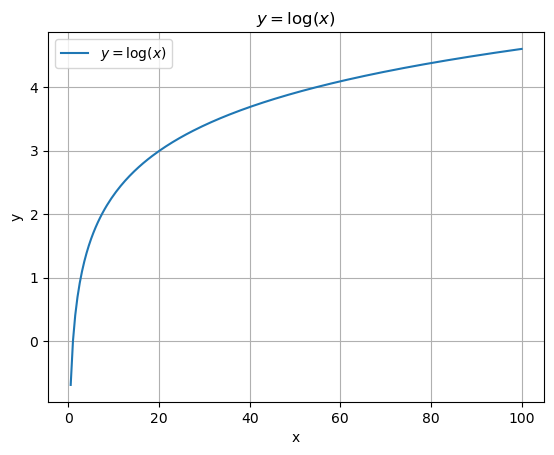

In [347]:
y = np.log(x)

plt.figure()
plt.plot(x, y, label=r"$y = \log(x)$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = \log(x)$")

plt.legend()
plt.grid(True)
plt.show()

7. $y = e^x$

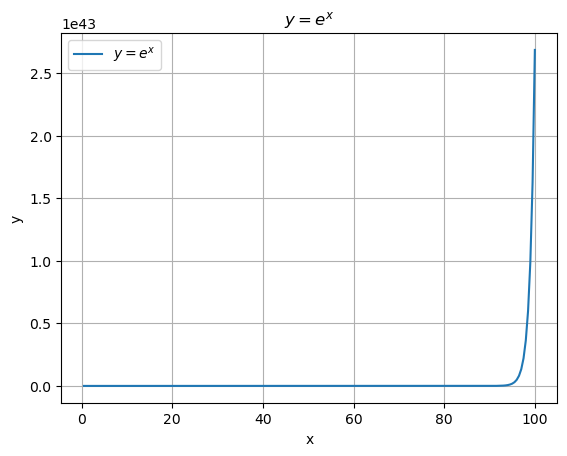

In [352]:
y = np.exp(x)

plt.figure()
plt.plot(x, y, label=r"$y = e^x$")

plt.xlabel("x")
plt.ylabel("y")

plt.title(r"$y = e^x$")

plt.legend()
plt.grid(True)
plt.show()

---

# Question 10: Matrix and Dataframe Manipulation

First, we generate a `20x5` matrix of random numbers drawn uniformly from $[1,2]$.

In [357]:
import numpy as np

matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix)

[[1.84039261 1.65562116 1.42180832 1.68052457 1.70213282]
 [1.19744419 1.19038113 1.63481652 1.43105406 1.57793792]
 [1.00743924 1.84563311 1.4332643  1.40485279 1.05851687]
 [1.48578803 1.88500433 1.23761718 1.79527493 1.4546264 ]
 [1.14124516 1.88563601 1.59779319 1.19251956 1.21686454]
 [1.53862667 1.97222552 1.02447972 1.22426753 1.33253394]
 [1.64384532 1.57773582 1.54026717 1.29859632 1.89638082]
 [1.9998493  1.85210494 1.38269647 1.60744149 1.45689875]
 [1.36951084 1.08162248 1.44102021 1.27849113 1.32257937]
 [1.16133745 1.42916231 1.06356096 1.3424603  1.69287451]
 [1.64159697 1.43410388 1.85068035 1.60419957 1.05575994]
 [1.30240599 1.96693172 1.98067996 1.97056499 1.5765268 ]
 [1.61206363 1.48946676 1.12254802 1.15131172 1.9691272 ]
 [1.77946494 1.92427997 1.54560855 1.3309247  1.86283191]
 [1.70585363 1.61504015 1.7620481  1.25960856 1.80639945]
 [1.09013098 1.25236763 1.28496905 1.56155117 1.33506933]
 [1.54122468 1.02355083 1.52134755 1.54390356 1.33034609]
 [1.1787324  1

Next, we create a dataframe using this matrix.

In [360]:
import pandas as pd

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
print(df)

           a         b         c         d         e
0   1.840393  1.655621  1.421808  1.680525  1.702133
1   1.197444  1.190381  1.634817  1.431054  1.577938
2   1.007439  1.845633  1.433264  1.404853  1.058517
3   1.485788  1.885004  1.237617  1.795275  1.454626
4   1.141245  1.885636  1.597793  1.192520  1.216865
5   1.538627  1.972226  1.024480  1.224268  1.332534
6   1.643845  1.577736  1.540267  1.298596  1.896381
7   1.999849  1.852105  1.382696  1.607441  1.456899
8   1.369511  1.081622  1.441020  1.278491  1.322579
9   1.161337  1.429162  1.063561  1.342460  1.692875
10  1.641597  1.434104  1.850680  1.604200  1.055760
11  1.302406  1.966932  1.980680  1.970565  1.576527
12  1.612064  1.489467  1.122548  1.151312  1.969127
13  1.779465  1.924280  1.545609  1.330925  1.862832
14  1.705854  1.615040  1.762048  1.259609  1.806399
15  1.090131  1.252368  1.284969  1.561551  1.335069
16  1.541225  1.023551  1.521348  1.543904  1.330346
17  1.178732  1.092341  1.829780  1.843894  1.

We now find the column with the highest standard deviation.

In [363]:
col_max_std = df.std().idxmax()
print(col_max_std)

b


Similarly, we can find the row with the lowest mean.

In [366]:
row_min_mean = df.mean(axis=1).idxmin()
print(row_min_mean)

8


---

# Question 11: Manipulating the Dataframe

First, we add a new column `f` to the dataframe, which is the sum of the columns `a..e`.

In [377]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

Next, we add a column `g` according to the specifications given in the question.

In [381]:
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)

           a         b         c         d         e         f    g
0   1.840393  1.655621  1.421808  1.680525  1.702133  8.300479  GT8
1   1.197444  1.190381  1.634817  1.431054  1.577938  7.031634  LT8
2   1.007439  1.845633  1.433264  1.404853  1.058517  6.749706  LT8
3   1.485788  1.885004  1.237617  1.795275  1.454626  7.858311  LT8
4   1.141245  1.885636  1.597793  1.192520  1.216865  7.034058  LT8
5   1.538627  1.972226  1.024480  1.224268  1.332534  7.092133  LT8
6   1.643845  1.577736  1.540267  1.298596  1.896381  7.956825  LT8
7   1.999849  1.852105  1.382696  1.607441  1.456899  8.298991  GT8
8   1.369511  1.081622  1.441020  1.278491  1.322579  6.493224  LT8
9   1.161337  1.429162  1.063561  1.342460  1.692875  6.689396  LT8
10  1.641597  1.434104  1.850680  1.604200  1.055760  7.586341  LT8
11  1.302406  1.966932  1.980680  1.970565  1.576527  8.797109  GT8
12  1.612064  1.489467  1.122548  1.151312  1.969127  7.344517  LT8
13  1.779465  1.924280  1.545609  1.330925  1.86

We need to find the number of rows with the value `LT8` in the column `g`.

In [387]:
lt8_count = (df["g"] == "LT8").sum()
print(lt8_count)

15


Now we can find the standard deviation of the column `f` for the rows where the value in column `g` is `LT8`.

In [391]:
lt8_std = df.loc[df["g"] == "LT8", "f"].std()
print(lt8_std)

0.45298931543204096


Similarly, we need to find the standard deviation of the column `f` for the rows where the value in column `g` is `GT8`.

In [397]:
gt8_std = df.loc[df["g"] == "GT8", "f"].std()
print(gt8_std)

0.24630363000597125


---

# Question 12: Broadcasting in Numpy

Broadcasting is numpy's way of performing arithmetic operations on arrays of different shapes, if either one of them can be expanded in a way to match the dimensions of the other one. The smaller array is automatically expanded across the larger one, along the axes of length 1 so that their shapes match.

First, let us look at simple array addition.

In [409]:
import numpy as np

arr1 = np.array([1, 2, 3])
arr2 = np.array([2, 3, 4])
arr1 + arr2

array([3, 5, 7])

We can also try adding a scalar to an array.

In [415]:
arr1 + 5

array([6, 7, 8])

Let us now consider another array of dimensions `1x3`.

In [421]:
arr3 = np.array([[4], [5], [6]])
arr1 + arr3

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

As we can see, numpy has added a `3x1` array to a `1x3` array without throwing any error. This happens because of broadcasting. `arr1` is expanded accross the vertical axis, and two copies of the first row are made, resulting in: $\begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3 \end{bmatrix}$. `arr3` is expanded accross the horizontal axis, and two copies of the first column are made, resulting in: $\begin{bmatrix} 4 & 5 & 6 \\ 4 & 5 & 6 \\ 4 & 5 & 6 \end{bmatrix}$. These arrays can now simply be added, one element at a time.

There are few cases, when broadcasting is not possible, and the two arrays cannot be added. This happens when neither of the arrays can be expanded to a common shape. Let us take an example.

In [434]:
arr4 = np.array([10, 11, 12, 13])
arr1 + arr4

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

This is how broadcasting works in numpy.

---

# Question 13: Argmin using Custom Function

We will first implement `argmin` using a custom python function, and then compare the results with `np.argmin` to verify the solution.

### Python Code

In [447]:
import numpy as np

def custom_argmin(arr: np.ndarray) -> int:
    # we first flatten the array to consider all elements even if they are nested
    flattened_arr = arr.ravel()
    
    min_val_index = 0
    min_val = flattened_arr[0]
    
    for i in range(1, len(flattened_arr)):
        if flattened_arr[i] < min_val:
            min_val = flattened_arr[i]
            min_val_index = i
    
    return min_val_index

Now, we create a random array to test our function and compare it against `np.argmin`.

In [463]:
arr = np.random.randint(1, 100, size=(4, 5))
print(arr)

[[39 24 30 21 54]
 [39 42 43 57 87]
 [82 93 31 95 65]
 [51 80 21 36  9]]


In [465]:
print(custom_argmin(arr))

19


In [469]:
print(np.argmin(arr))

19


As we can see, both produce the same result.

---